#`Feature Importance by Random Forest`

---



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('cleaned3.csv')
df.head()

,Unnamed: 0,cancel,year,zip.code,ni.age,len.at.res,credit,premium,gender,ni.marital.status,...,house.color_blue,house.color_red,house.color_white,house.color_yellow,dwelling_Condo,dwelling_House,dwelling_Tenant,coverage_A,coverage_B,coverage_C
0,0,0,2013,98004.0,37.0,18.000000,2,950.507336,0,0.0,...,1,0,0,0,0,0,1,0,0,1
1,1,0,2013,85017.0,40.0,17.000000,1,909.346046,0,1.0,...,0,0,1,0,1,0,0,1,0,0
2,2,0,2013,80021.0,45.0,14.000000,2,897.084502,1,0.0,...,0,0,1,0,0,1,0,1,0,0
3,3,0,2013,85002.0,45.0,24.366136,2,979.039007,1,0.0,...,0,1,0,0,0,1,0,1,0,0
4,4,0,2013,50001.0,36.0,16.000000,2,932.379027,1,1.0,...,0,0,0,1,0,1,0,0,0,1


In [0]:
df = df.drop("Unnamed: 0", 1)
df = df.drop("zip.code", 1)


In [4]:
df.shape

(1025272, 31)

In [0]:
y = df[['cancel']]

In [0]:
X = df.iloc[:,1:31]

In [0]:
# Only using 10000 obs to show a rough idea
X_trial = X[1:10000]
y_trial = y[1:10000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 1) premium                        0.129357
 2) ni.age                         0.106655
 3) tenure                         0.098444
 4) len.at.res                     0.094028
 5) n.children                     0.064472
 6) credit                         0.059853
 7) n.adults                       0.054526
 8) year                           0.047251
 9) gender                         0.024400
10) claim.ind                      0.019267
11) ni.marital.status              0.018886
12) coverage_C                     0.018853
13) house.color_white              0.018466
14) sales.channel_Phone            0.017747
15) sales.channel_Broker           0.017493
16) coverage_A                     0.017389
17) house.color_blue               0.017353
18) state_VA                       0.016877
19) house.color_red                0.016800
20) coverage_B                     0.016452
21) dwelling_House                 0.016089
22) state_IA                       0.014742
23) dwelling_Condo              

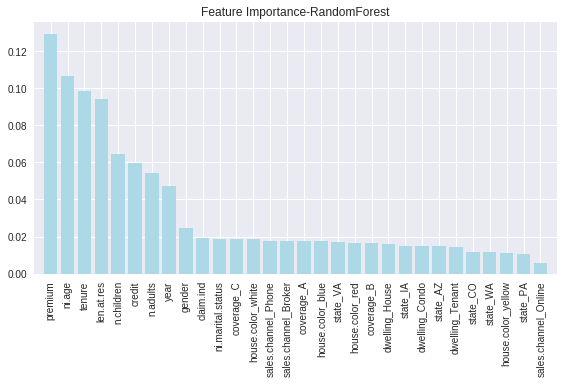

In [8]:

forest=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0)


X_train=X_trial
y_train=y_trial

forest.fit(X_train,y_train)
importances=forest.feature_importances_

feat_labels = X.columns
indices=np.argsort(importances)[::-1]

X_train=np.array(X_train)
N=X_train.shape[1]
for f in range(30):
    # assess feature importance
    print ("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]) )

#Visualization of feature importance
plt.title('Feature Importance-RandomForest')

plt.bar(range(30),importances[indices[:30]],color='lightblue',align='center')
plt.xticks(range(30),np.array(feat_labels)[indices[:30]],rotation=90)

plt.xlim([-1,30])
plt.tight_layout()
plt.show()
